In [1]:
import numpy as np

#Read the csv file with the loadtxt() function
fname = "resale-flat-prices/resale-flat-prices-based-on-approval-date-1990-1999.csv"
data = np.loadtxt(fname, skiprows=1,dtype=[('month','U25'),('town','U50'),('flat_type','U25'),('block','U25'),('street_name','U50'),('storey_range','U25'),('floor_area','f'),('flat_model','U25'),('lease_commence_date','i8'),('resale_price','f')],delimiter=",")
fname2= "resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv"
data2 = np.loadtxt(fname2, skiprows=1,dtype=[('month','U25'),('town','U50'),('flat_type','U25'),('block','U25'),('street_name','U50'),('storey_range','U25'),('floor_area','f'),('flat_model','U25'),('lease_commence_date','i8'),('resale_price','f')],delimiter=",")
fname3= "resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv"
data3 = np.loadtxt(fname3, skiprows=1,dtype=[('month','U25'),('town','U50'),('flat_type','U25'),('block','U25'),('street_name','U50'),('storey_range','U25'),('floor_area','f'),('flat_model','U25'),('lease_commence_date','i8'),('resale_price','f')],delimiter=",")

#Create a new csv file to consolidate all the data into this file
fname_all = "resale-flat-prices/combined-data.csv"

#Opening all the files and writing each line in f,f2,f3 into the new combined-data file
with open(fname) as f, open(fname2) as f2, open(fname3) as f3, open(fname_all, 'w') as g:
    for line in f:
        g.write(line)
    next(f2)
    for line in f2:
        g.write(line)
    next(f3)
    for line in f3:
        g.write(line)
        
data_all = np.loadtxt(fname_all, skiprows=1,dtype=[('month','U25'),('town','U50'),('flat_type','U25'),('block','U25'),('street_name','U50'),('storey_range','U25'),('floor_area','f'),('flat_model','U25'),('lease_commence_date','int'),('resale_price','f')],delimiter=",")

In [73]:
title = "Resale Flat Prices"
titlelen = len(title)
print("{:*^{titlelen}}".format(title,titlelen=titlelen+6))

#Print out the number of rows in this dataset
print("There are {} rows in this dataset".format(len(data_all)))
print()

uniq_town = set(data_all['town'])
print("There are " + str(len(uniq_town)) + " unique number of towns in this dataset")
print()

#To find out the max resale price
max_price = data_all['resale_price'].max()
argmax_price = data_all['resale_price'].argmax()
max_year = data_all[argmax_price]['month']
max_town = data_all[argmax_price]['town']


#to find out min resale price
min_price = data_all['resale_price'].min()
argmin_price = data_all['resale_price'].argmin()
min_year = data_all[argmin_price]['month']
min_town = data_all[argmin_price]['town']

#mean resale price throughout the years
mean_price = int(np.mean(data_all['resale_price']))
std_dev = int(np.std(data_all['resale_price']))

print("The highest resale price is ${} at {} in {}".format(max_price,max_town,max_year))
print("The lowest resale price is ${} at {} in {}".format(min_price,min_town,min_year))
print("The mean resale price is ${}".format(mean_price))
print("The standard deviation is ${}".format(std_dev))

***Resale Flat Prices***
There are 709054 rows in this dataset

There are 27 unique number of towns in this dataset

The highest resale price is $1088888.0 at BISHAN in 2014-10
The lowest resale price is $5000.0 at BUKIT MERAH in 1990-07
The mean resale price is $269516
The standard deviation is $134534


In [82]:
#create a dictionary to store the mean resale price of each year
price = {} 

#iterate through the years 1990 to 2014 for corresponding resale price
resale_year_price = 1990 #data starts from 1990
while resale_year_price < 2015: #data ends in 2014
    keyword = str(resale_year_price) #converting int to str for search in column
    column_to_search = data_all['month'] 
    out = [i for i, v in enumerate(column_to_search) if keyword in v]
    price_out = data_all[out]
    #store the mean resale price of each year under the corresponding year key
    median_price = np.median(price_out['resale_price'])
    price["{0}".format(resale_year_price)] = int(median_price)
    #loop through the next year until 2014
    resale_year_price = resale_year_price +1
     
#print(price)

#print(price.keys())



In [4]:
#preparing the data for plotting

#changing uniq_town into a list
temp = list(uniq_town)

#changing uniq_town from list to numpy array
towns = np.array(temp)
#print(towns)


['BEDOK' 'BISHAN' 'CLEMENTI' 'PUNGGOL' 'JURONG EAST' 'PASIR RIS'
 'BUKIT BATOK' 'LIM CHU KANG' 'YISHUN' 'TOA PAYOH' 'QUEENSTOWN'
 'CENTRAL AREA' 'BUKIT MERAH' 'BUKIT PANJANG' 'WOODLANDS' 'SENGKANG'
 'HOUGANG' 'JURONG WEST' 'MARINE PARADE' 'ANG MO KIO' 'SERANGOON'
 'BUKIT TIMAH' 'SEMBAWANG' 'KALLANG/WHAMPOA' 'TAMPINES' 'GEYLANG'
 'CHOA CHU KANG']


Flier: 1.0,938000.0
Flier: 2.0,880000.0
Flier: 3.0,1088888.0
Flier: 4.0,938000.0
Flier: 5.0,945000.0
Flier: 6.0,770000.0
Flier: 7.0,1000000.0
Flier: 8.0,965000.0
Flier: 9.0,810000.0
Flier: 10.0,960000.0
Flier: 11.0,943999.0
Flier: 12.0,920000.0
Flier: 13.0,870000.0
Flier: 14.0,750000.0
Flier: 15.0,1020000.0
Flier: 17.0,950000.0
Flier: 18.0,860000.0
Flier: 20.0,1000000.0
Flier: 21.0,670000.0
Flier: 22.0,720000.0
Flier: 23.0,930000.0
Flier: 24.0,970000.0
Flier: 25.0,980000.0
Flier: 26.0,850000.0
Flier: 27.0,883000.0


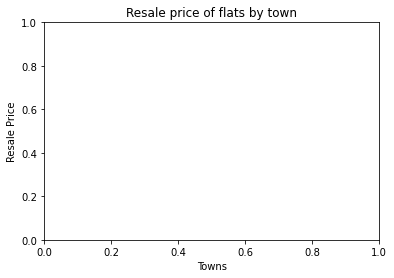

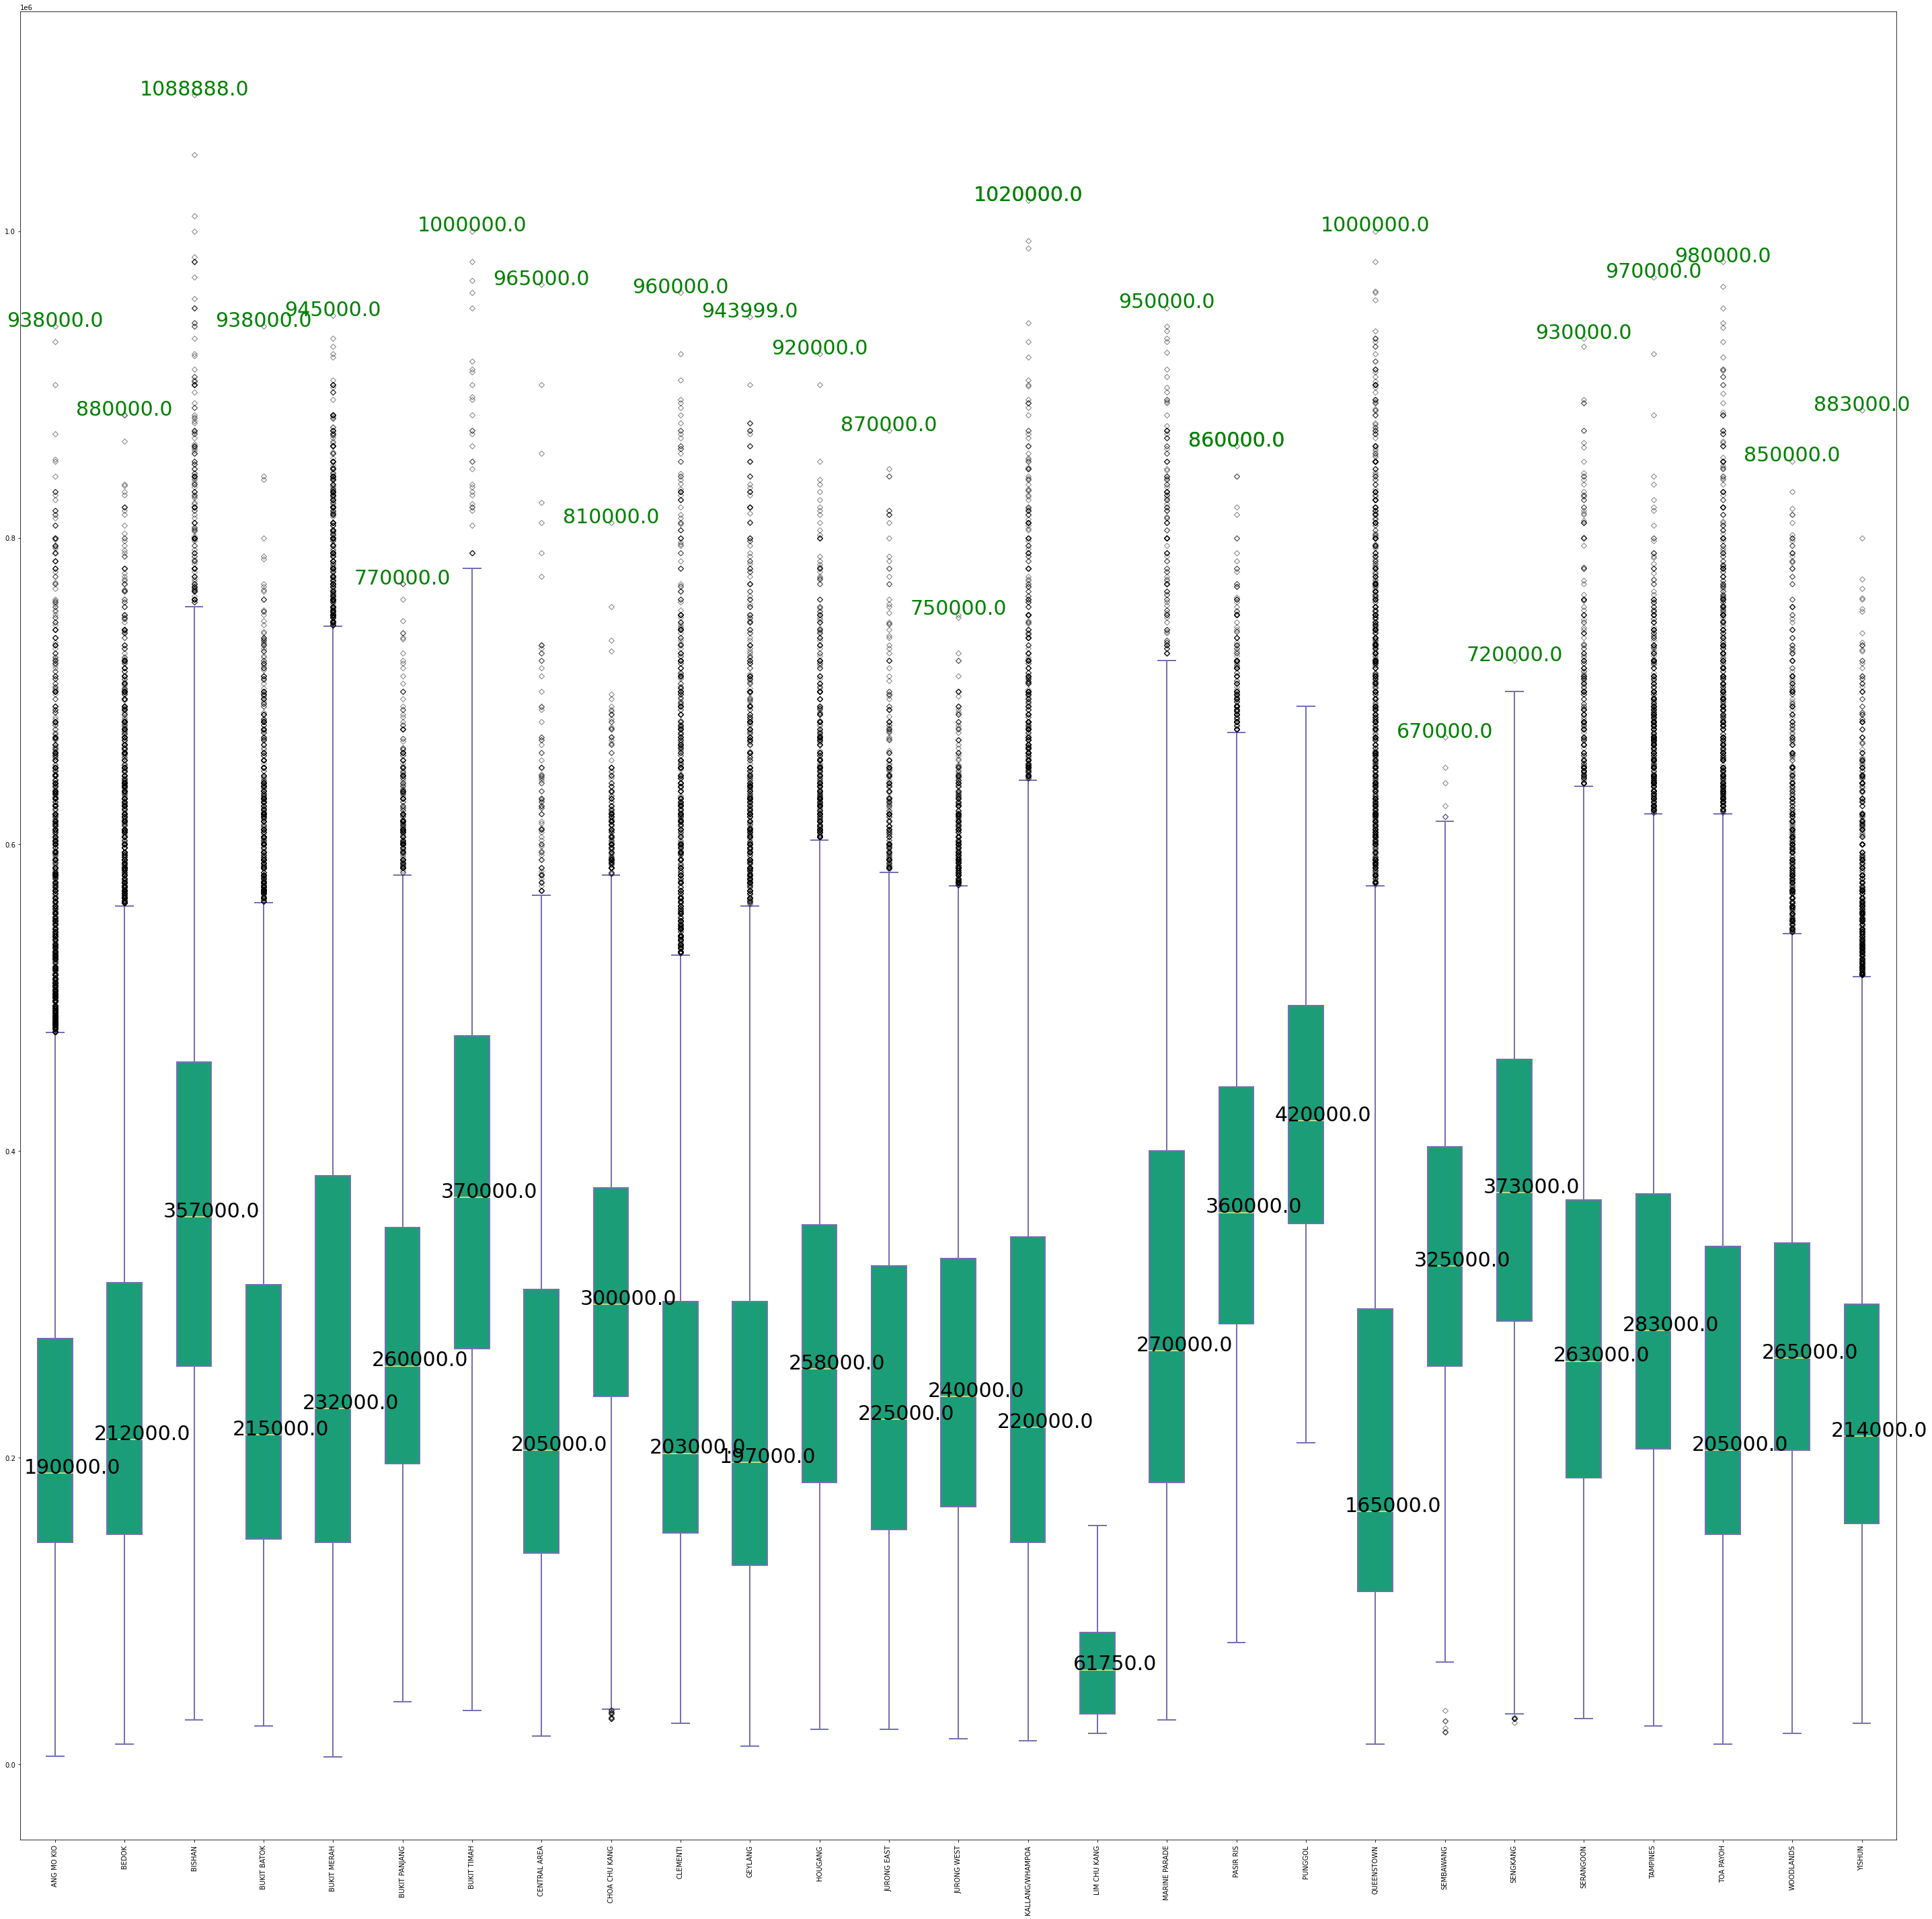

<Figure size 432x288 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt

#null_rows = np.isnan(data_all['resale_price'])

plt.title("Resale price of flats by town")
plt.xlabel("Towns")
plt.ylabel("Resale Price")
labels = towns #each label will be an unique town from the numpy array
labels.sort()
#print(labels)
town = np.arange(0,len(labels))
town_price = data_all[['town','resale_price']]

#extracting the corresponding resale price to each town
price = town_price['resale_price']
price_AMK = price[town_price['town'] == "ANG MO KIO"]
price_B = price[town_price['town'] == "BEDOK"]
price_BI = price[town_price['town'] == "BISHAN"]
price_BB = price[town_price['town'] == "BUKIT BATOK"]
price_BM = price[town_price['town'] == "BUKIT MERAH"]
price_BP = price[town_price['town']== "BUKIT PANJANG"]
price_BT =price[town_price['town'] == "BUKIT TIMAH"]
price_CA = price[town_price['town'] == "CENTRAL AREA"]
price_CCK = price[town_price['town'] == "CHOA CHU KANG"]
price_CL = price[town_price['town'] == "CLEMENTI"]
price_GL = price[town_price['town'] == "GEYLANG"]
price_HG =price[town_price['town'] == "HOUGANG"]
price_JE = price[town_price['town'] == "JURONG EAST"]
price_JW = price[town_price['town'] == "JURONG WEST"]
price_KW = price[town_price['town'] == "KALLANG/WHAMPOA"]
price_LCK = price[town_price['town'] == "LIM CHU KANG"]
price_MP = price[town_price['town'] == "MARINE PARADE"]
price_PR = price[town_price['town'] == "PASIR RIS"]
price_PG = price[town_price['town'] == "PUNGGOL"]
price_QT = price[town_price['town'] == "QUEENSTOWN"]
price_SB = price[town_price['town'] == "SEMBAWANG"]
price_SK = price[town_price['town'] == "SENGKANG"]
price_SR = price[town_price['town'] == "SERANGOON"]
price_TM = price[town_price['town'] == "TAMPINES"]
price_TP = price[town_price['town'] == "TOA PAYOH"]
price_WL =price[town_price['town'] == "WOODLANDS"]
price_Y = price[town_price['town'] == "YISHUN"]

town_combined =[price_AMK, price_B, price_BI, price_BB,price_BM,price_BP,price_BT, price_CA,price_CCK,price_CL,price_GL,price_HG,price_JE,price_JW,price_KW,price_LCK, price_MP, price_PR,price_PG,price_QT,price_SB,price_SK,price_SR,price_TM,price_TP,price_WL,price_Y]
#print(len(town_combined))

plt.figure(2,figsize=(50,50))
plt.yticks()
plt.xticks(rotation='vertical')
bp_dict = plt.boxplot(town_combined,labels=labels,patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp_dict['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
## change color and linewidth of the whiskers
for whisker in bp_dict['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp_dict['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp_dict['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp_dict['fliers']:
    flier.set(marker='D', color='#e7298a', alpha=0.5)

#print(bp_dict.keys())

for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, '%.1f' % y,
         horizontalalignment='center',fontsize=30) # draw above, centered

fliers = []
for line in bp_dict['fliers']:
    ndarray = line.get_xydata()
    if (len(ndarray)>0):
        max_flier = ndarray[:,1].max()
        max_flier_index = ndarray[:,1].argmax()
        x = ndarray[max_flier_index,0]
        print("Flier: " + str(x) + "," + str(max_flier))
     
    plt.text(x,max_flier,'%.1f' % max_flier,horizontalalignment='center',fontsize=30,color='green') 

plt.show()


In [51]:
#preparing data for plotting of barchar below

#extracting the values (median resale values) from the price dictionary into a list
tempmedprice = list(price.values()) 
#converting list to numpy array
medprice=np.array(tempmedprice)
#extracting the keys (years) from price dictionary into a list
tempkey = list(price.keys())


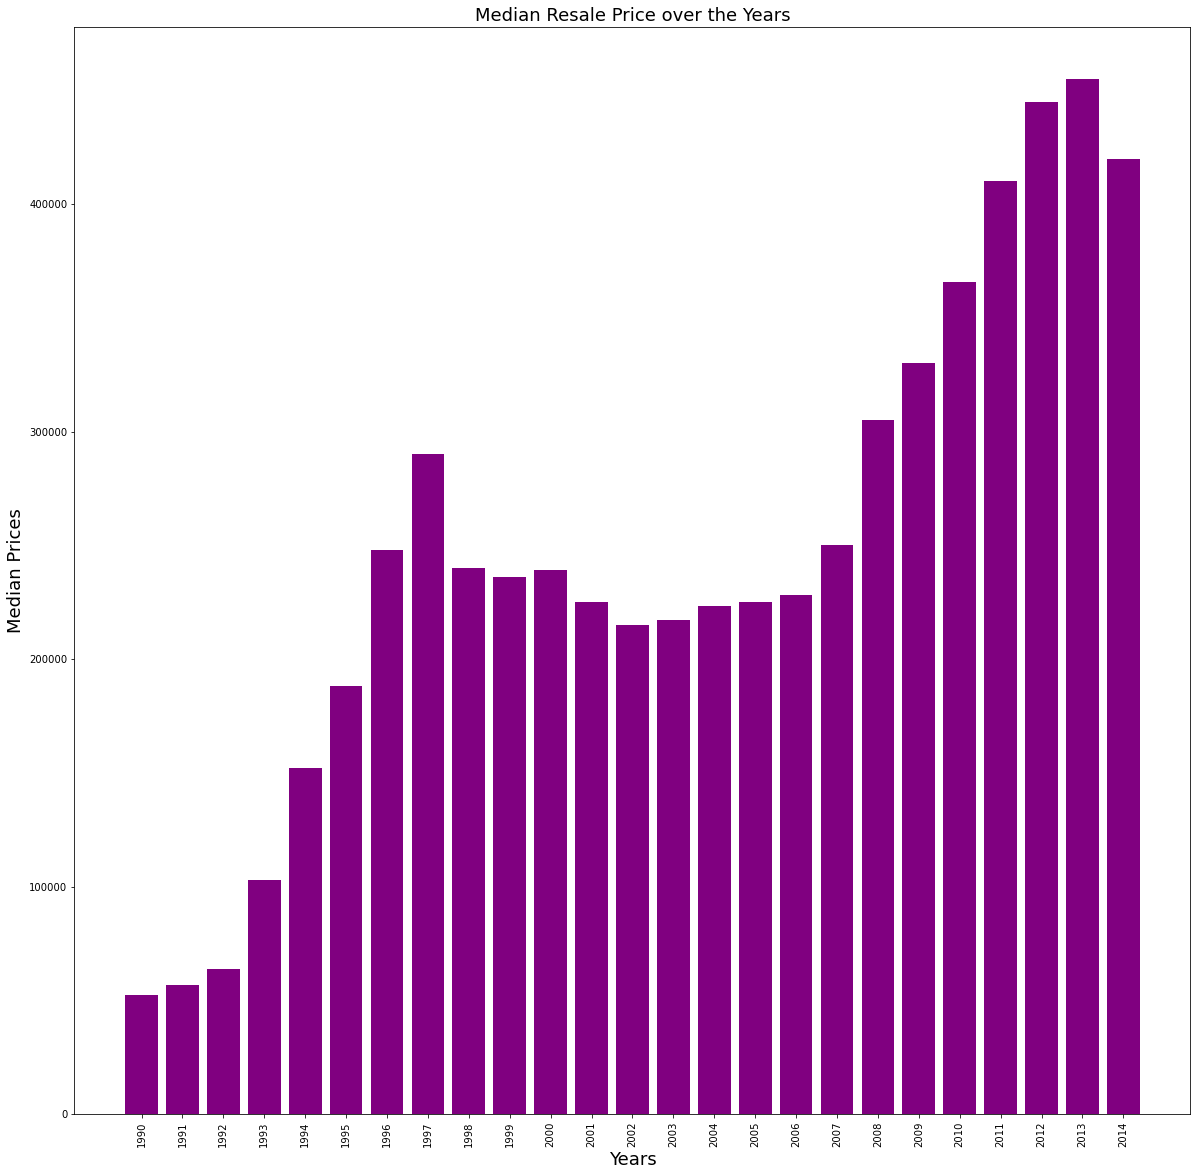

In [81]:
import matplotlib.pyplot as plt

figbar, axbar = plt.subplots(1,figsize = (20,20))
labels=tempkey #each year as a label
plt.xticks(rotation='vertical')
plt.bar(labels,medprice,color="purple")
plt.ylabel('Median Prices',fontsize=18)
plt.xlabel('Years',fontsize=18)
plt.title("Median Resale Price over the Years",fontsize=18)
#axbar.set(xlabel="Years",ylabel="Median Prices",title="Median Resale Price over the Years")

plt.show()